## Problem statement

#### Prepare a classification model using Naive Bayes for salary data


In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn import preprocessing 

In [2]:
## Loading the dataset

salary_dt_train=pd.read_csv('SalaryData_Train.csv')

In [3]:
salary_dt_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
## Test data

salary_dt_test=pd.read_csv('SalaryData_Test.csv')
salary_dt_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
salary_dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
salary_dt_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
salary_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
salary_dt_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

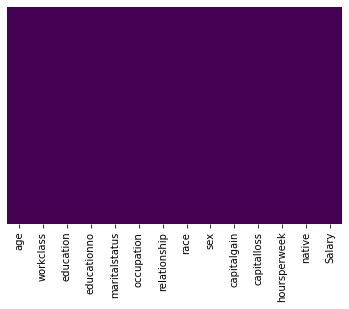

In [9]:
sns.heatmap(salary_dt_train.isna(),cmap='viridis',cbar=False,yticklabels=False)

<AxesSubplot:>

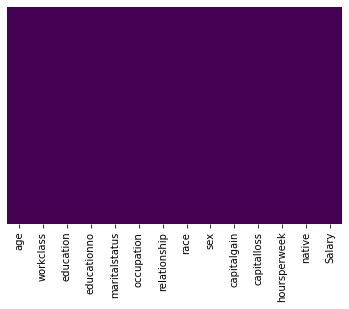

In [10]:
sns.heatmap(salary_dt_test.isna(),cmap='viridis',cbar=False,yticklabels=False)

In [11]:
## Checking for duplicate values

salary_dt_train[salary_dt_train.duplicated()].shape

(3258, 14)

In [12]:
salary_dt_test[salary_dt_test.duplicated()].shape

(930, 14)

In [13]:
## Removing Duplicate Values in Both Train and Test Data
dups_train=salary_dt_train.duplicated()
print('No of Duplicates before removing: %d ' % dups_train.sum() + "Shape:",salary_dt_train[salary_dt_train.duplicated()].shape)

salary_dt_train.drop_duplicates(inplace=True)
print(salary_dt_train[salary_dt_train.duplicated()].shape)


No of Duplicates before removing: 3258 Shape: (3258, 14)
(0, 14)


In [14]:
## Removing Duplicate Values in Both Train and Test Data
dups_test=salary_dt_test.duplicated()
print('No of Duplicates before removing: %d ' % dups_test.sum() + "Shape:",salary_dt_test[salary_dt_test.duplicated()].shape)

salary_dt_test.drop_duplicates(inplace=True)
print(salary_dt_test[salary_dt_test.duplicated()].shape)


No of Duplicates before removing: 930 Shape: (930, 14)
(0, 14)


In [15]:
salary_dt_train.shape,salary_dt_test.shape

((26903, 14), (14130, 14))

In [16]:
## We are good with Null and Duplicate Values


In [17]:
salary_dt_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
salary_dt_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Data Visualizations

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

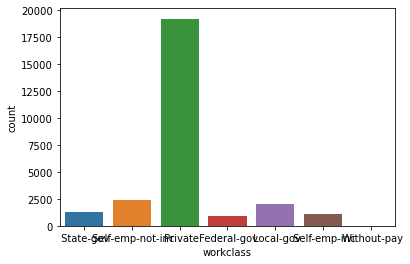

In [19]:
sns.countplot(salary_dt_train['workclass'])

In [20]:
salary_dt_train['workclass'].value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [21]:
salary_dt_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [22]:
salary_dt_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
 13  Salary         26903 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.1+ MB


C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

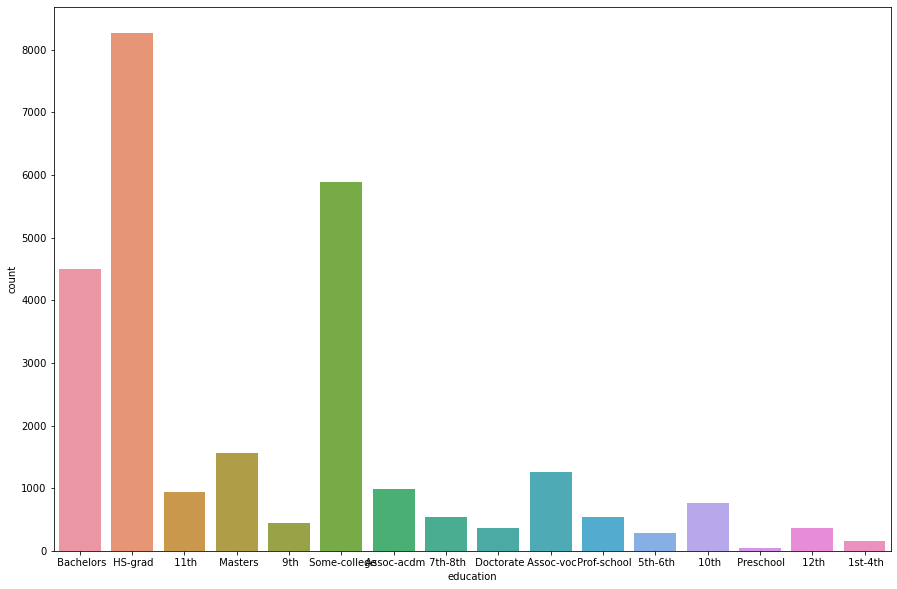

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(salary_dt_train['education'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

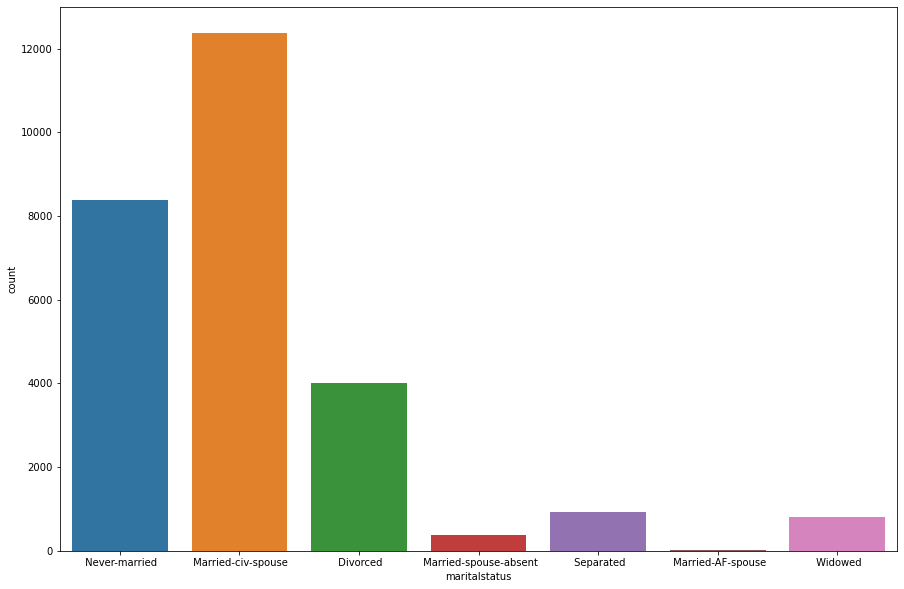

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(salary_dt_train['maritalstatus'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

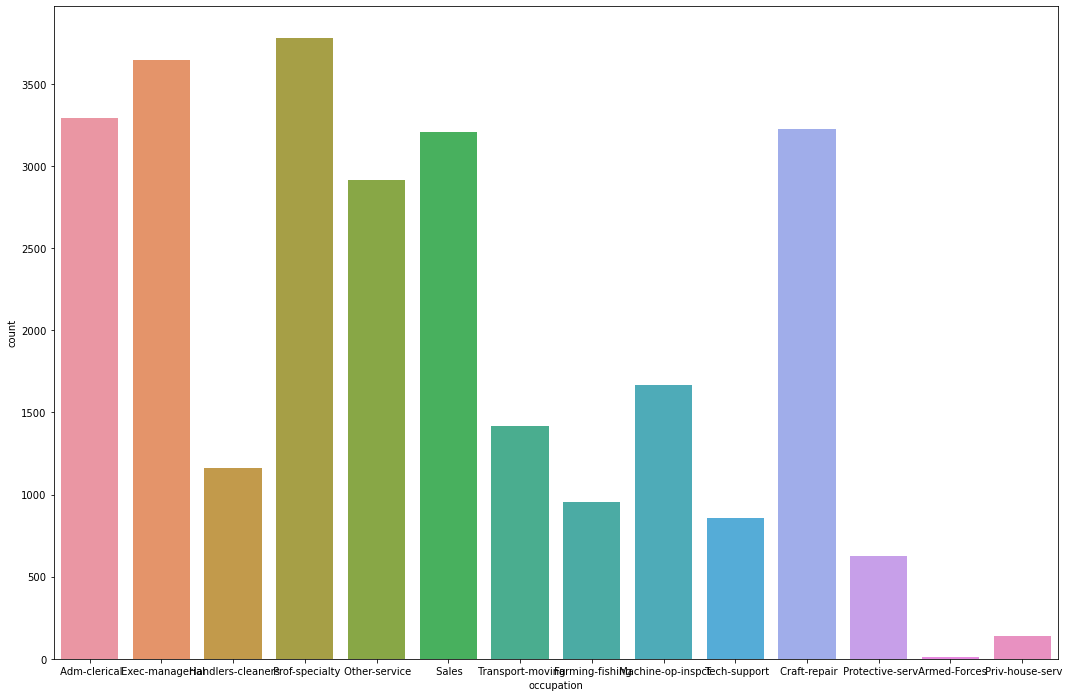

In [25]:
plt.figure(figsize=(18,12))
sns.countplot(salary_dt_train['occupation'])

In [26]:
## Getting Value Counts for Categorical COlumns-

def getValueCounts(df,feature):
    if df[feature].dtype=='object':
        print('\n" Value counts for' +str(feature),df[feature].value_counts())
        
        
   

In [27]:
for feature in salary_dt_train.columns:
    if salary_dt_train[feature].dtype=='object':
        getValueCounts(salary_dt_train,str(feature))


" Value counts forworkclass  Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

" Value counts foreducation  HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

" Value counts formaritalstatus  Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

" Value counts foroccupation  Prof-specialty     

## Describe

In [28]:
salary_dt_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Checking for outliers

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

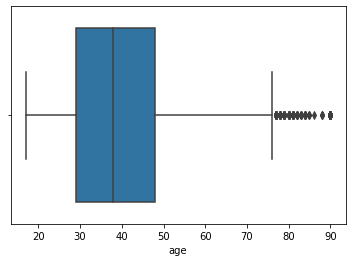

In [29]:
sns.boxplot(salary_dt_train['age'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalgain'>

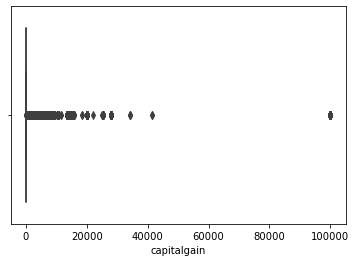

In [30]:
sns.boxplot(salary_dt_train['capitalgain'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalloss'>

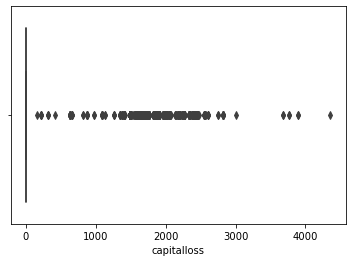

In [31]:
sns.boxplot(salary_dt_train['capitalloss'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hoursperweek'>

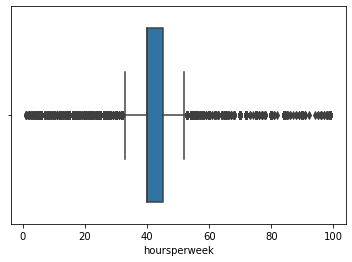

In [32]:
sns.boxplot(salary_dt_train['hoursperweek'])

In [33]:
salary_dt_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

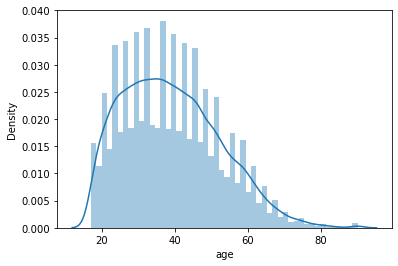

In [34]:
## Plotting Distplots to check Skewness

sns.distplot(salary_dt_train['age'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

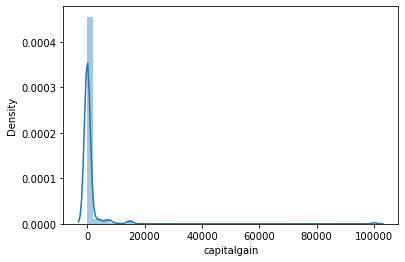

In [35]:

sns.distplot(salary_dt_train['capitalgain'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

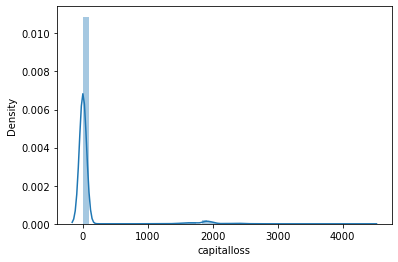

In [36]:

sns.distplot(salary_dt_train['capitalloss'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

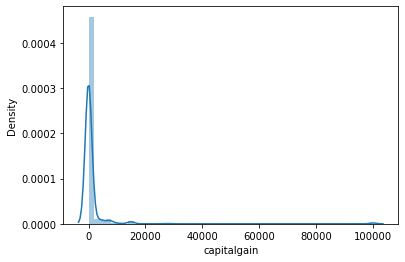

In [37]:
sns.distplot(salary_dt_test['capitalgain'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

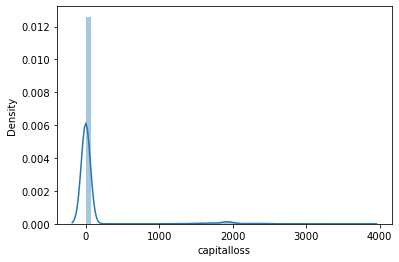

In [38]:

sns.distplot(salary_dt_test['capitalloss'])

##### We can see data is highly skewed for captial loss and gain so we can perform Transformation on Data

In [39]:
salary_dt_train['capitalgain'].value_counts()

0        24379
15024      331
7688       266
7298       238
99999      147
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capitalgain, Length: 118, dtype: int64

In [40]:
## Since most of the values are zero, we cant apply Log Transformation 
## as it will lead to infinity

In [41]:
## Also I have tested Sqrt Transformation but it also didnt Work so we will be moving ahead further

## Feature Selection

In [42]:
salary_dt_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
 13  Salary         26903 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.1+ MB


In [43]:
categorical_columns=salary_dt_train.select_dtypes(exclude='number').drop(['Salary'], axis = 1).columns
categorical_columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

## Performing chi2_contingency Test

In [44]:
from scipy.stats import chi2_contingency

In [45]:
chi2_check=[]

In [46]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(salary_dt_train['Salary'], salary_dt_train[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Accept Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check]).T 

res.columns = ['Column', 'Hypothesis']
print(res)

          Column              Hypothesis
0      workclass  Reject Null Hypothesis
1      education  Reject Null Hypothesis
2  maritalstatus  Reject Null Hypothesis
3     occupation  Reject Null Hypothesis
4   relationship  Reject Null Hypothesis
5           race  Reject Null Hypothesis
6            sex  Reject Null Hypothesis
7         native  Reject Null Hypothesis


In [47]:
## From the above data , we can see we have to consider all the columns

## Understanding Target Variable

In [48]:
salary_dt_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

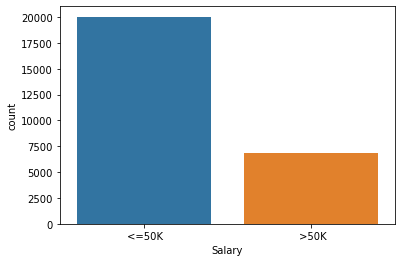

In [49]:
sns.countplot(salary_dt_train['Salary'])

In [50]:
##### We can clearly see there is an imbalance in the data, Imbalance in data affects the model in predicting target Variable

 #### We can see the majority of the people are having Salary less than 50K. The data is imbalanced. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.

## Label Encoding on Categorical Data

In [51]:
salary_dt_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
salary_dt_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [53]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
salary_dt_train['workclass']=enc.fit_transform(salary_dt_train['workclass'])



In [54]:
salary_dt_train['education']=enc.fit_transform(salary_dt_train['education'])
salary_dt_train['maritalstatus']=enc.fit_transform(salary_dt_train['maritalstatus'])
salary_dt_train['occupation']=enc.fit_transform(salary_dt_train['occupation'])
salary_dt_train['relationship']=enc.fit_transform(salary_dt_train['relationship'])
salary_dt_train['race']=enc.fit_transform(salary_dt_train['race'])
salary_dt_train['native']=enc.fit_transform(salary_dt_train['native'])

In [55]:
salary_dt_train=pd.get_dummies(data=salary_dt_train,columns=['sex'],drop_first=True)


In [56]:
salary_dt_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,Salary,sex_ Male
0,39,5,9,13,4,0,1,4,2174,0,40,37,<=50K,1
1,50,4,9,13,2,3,0,4,0,0,13,37,<=50K,1
2,38,2,11,9,0,5,1,4,0,0,40,37,<=50K,1
3,53,2,1,7,2,5,0,2,0,0,40,37,<=50K,1
4,28,2,9,13,2,9,5,2,0,0,40,4,<=50K,0


In [57]:
## Performing Same transformations on test Data

salary_dt_test['workclass']=enc.fit_transform(salary_dt_test['workclass'])
salary_dt_test['education']=enc.fit_transform(salary_dt_test['education'])
salary_dt_test['maritalstatus']=enc.fit_transform(salary_dt_test['maritalstatus'])
salary_dt_test['occupation']=enc.fit_transform(salary_dt_test['occupation'])
salary_dt_test['relationship']=enc.fit_transform(salary_dt_test['relationship'])
salary_dt_test['race']=enc.fit_transform(salary_dt_test['race'])
salary_dt_test['native']=enc.fit_transform(salary_dt_test['native'])

In [58]:
salary_dt_test=pd.get_dummies(data=salary_dt_test,columns=['sex'],drop_first=True)


In [59]:
salary_dt_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,Salary,sex_ Male
0,25,2,1,7,4,6,3,2,0,0,40,37,<=50K,1
1,38,2,11,9,2,4,0,4,0,0,50,37,<=50K,1
2,28,1,7,12,2,10,0,4,0,0,40,37,>50K,1
3,44,2,15,10,2,6,0,2,7688,0,40,37,>50K,1
4,34,2,0,6,4,7,1,4,0,0,30,37,<=50K,1


In [60]:
## WE are ready with our data.

## Splitting the columns into feature and Label data


In [61]:
X_train=salary_dt_train.drop('Salary',axis=1)

X_train.shape

(26903, 13)

In [62]:
Y_train=salary_dt_train['Salary']
Y_train.shape

(26903,)

In [63]:
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male
0,39,5,9,13,4,0,1,4,2174,0,40,37,1
1,50,4,9,13,2,3,0,4,0,0,13,37,1
2,38,2,11,9,0,5,1,4,0,0,40,37,1
3,53,2,1,7,2,5,0,2,0,0,40,37,1
4,28,2,9,13,2,9,5,2,0,0,40,4,0


In [64]:
Y_train.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

In [65]:
X_test=salary_dt_test.drop('Salary',axis=1)
X_test.shape

(14130, 13)

In [66]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male
0,25,2,1,7,4,6,3,2,0,0,40,37,1
1,38,2,11,9,2,4,0,4,0,0,50,37,1
2,28,1,7,12,2,10,0,4,0,0,40,37,1
3,44,2,15,10,2,6,0,2,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,0,0,30,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,0,0,40,37,1
15056,39,2,9,13,0,9,1,4,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,0,0,50,37,1
15058,44,2,9,13,0,0,3,1,5455,0,40,37,1


In [67]:
Y_test=salary_dt_test['Salary']
Y_test.shape

(14130,)

In [68]:
Y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 14130, dtype: object

##### Since we earlier saw there was an imbalance in the data,so we try to resample the data using SMOTE resampling Techinque

In [69]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy='not majority')


In [70]:
X_resample,Y_resample=sm.fit_resample(X_train,Y_train)
Y_df = pd.DataFrame(Y_resample)

In [71]:
X_resample

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male
0,39,5,9,13,4,0,1,4,2174,0,40,37,1
1,50,4,9,13,2,3,0,4,0,0,13,37,1
2,38,2,11,9,0,5,1,4,0,0,40,37,1
3,53,2,1,7,2,5,0,2,0,0,40,37,1
4,28,2,9,13,2,9,5,2,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40041,30,2,9,13,2,0,0,4,0,0,40,37,1
40042,39,2,15,10,2,6,0,4,0,0,50,37,1
40043,29,2,11,9,2,6,5,4,4386,0,40,37,0
40044,33,2,9,13,2,9,0,4,0,0,55,37,1


In [72]:
Y_df

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
40041,>50K
40042,>50K
40043,>50K
40044,>50K


## Model Building

### Using Multinomial Naive Bayes to build the model


In [73]:
from sklearn.naive_bayes import MultinomialNB as MB

classifier_mb=MB()

classifier_mb.fit(X_resample,Y_df)

C:\Users\samee\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

#### Predicting of Train and Test

In [74]:
y_pred_train=classifier_mb.predict(X_resample)
y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [75]:
y_pred_test=classifier_mb.predict(X_test)
y_pred_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [76]:
accuracy_train=accuracy_score(Y_df,y_pred_train)
accuracy_train

0.5905958148129651

In [77]:
accuracy_test=accuracy_score(Y_test,y_pred_test)
accuracy_test

0.7733899504600141

In [78]:
confusion_matrix(Y_test,y_pred_test)

array([[10151,   469],
       [ 2733,   777]], dtype=int64)

In [79]:
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.86     10620
        >50K       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130



In [80]:
## Lets try without Sampling and check the performance Metrics

In [81]:
classifier_mb.fit(X_train,Y_train)

MultinomialNB()

#### Prediction on Unsampled Data

In [82]:
y_pred_train=classifier_mb.predict(X_train)
y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [83]:
y_pred_test=classifier_mb.predict(X_test)
y_pred_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [84]:
accuracy_train=accuracy_score(Y_train,y_pred_train)
accuracy_train

0.7683158012117608

In [85]:
accuracy_test=accuracy_score(Y_test,y_pred_test)
accuracy_test

0.7733899504600141

In [86]:
print(confusion_matrix(Y_test,y_pred_test))

[[10151   469]
 [ 2733   777]]


In [87]:
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.86     10620
        >50K       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130



In [88]:
## So we can see we got better train and test accuracy without Resampling

## Using Gaussian Naive Bayes to build the model


In [89]:
from sklearn.naive_bayes import GaussianNB as GB

classifier_gb=GB()

classifier_gb.fit(X_train,Y_train)


GaussianNB()

In [90]:
y_pred_train_=classifier_gb.predict(X_train)
y_pred_train_

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [91]:
y_pred_test_=classifier_gb.predict(X_test)
y_pred_test_

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [92]:
print(accuracy_score(Y_train, y_pred_train_))

0.7933687692822362


In [93]:
print(accuracy_score(Y_test, y_pred_test_))

0.7951875442321302


In [94]:
print(confusion_matrix(Y_test,y_pred_test_))

[[10056   564]
 [ 2330  1180]]


In [95]:
print(classification_report(Y_test,y_pred_test_))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     10620
        >50K       0.68      0.34      0.45      3510

    accuracy                           0.80     14130
   macro avg       0.74      0.64      0.66     14130
weighted avg       0.78      0.80      0.77     14130



### So We can see the model accuracy is best for Gaussian Naive Bayes algorithm.
